# Лабораторная работа №3. Моделирование непрерывных СВ.
Смоделировать непрерывную  случайную величину (задания на стр. 25-47). Исследовать точность моделирования.

1)	Осуществить моделирование n = 1000 реализаций СВ из нормального закона распределения N(m, s2) с заданными параметрами. Вычислить несмещенные оценки математического ожидания и дисперсии, сравнить их с истинными. 

2)	Смоделировать n = 1000 СВ из заданных абсолютно непрерывных распределений. Вычислить несмещенные оценки математического ожидания и дисперсии, сравнить их с истинными значениями (если это возможно). 

3)	Для каждой из случайных величин построить свой критерий Колмогорова с уровнем значимость ε=0.05. Проверить, что вероятность ошибки I рода стремится к 0.05.

4)	Для каждой из случайных величин построить свой χ2-критерий Пирсона с уровнем значимость ε=0.05. Проверить, что вероятность ошибки I рода стремится к 0.05.

5)	Осуществить проверку каждой из сгенерированных выборок каждым из построенных критериев.





Нормальное распределние:


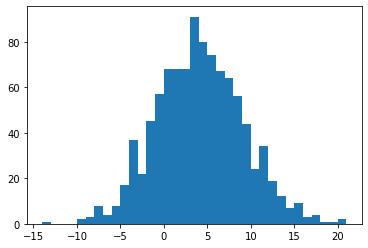

Истинное математическое ожидание E =  4.000000
Истинная дисперсия D =  25.000000
Полученное в результате моделирования E =  4.138588
Полученная в результате моделирования D =  24.706887
Критерий Пирсона: 22.924215, квантиль: 43.800000
Критерий Колмагорова: 0.431721, квантиль: 1.630000



Распределение Вейбулла:


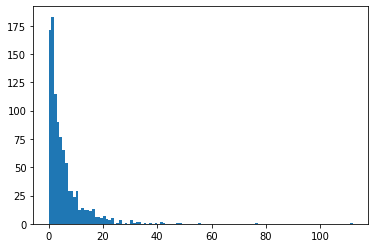

Истинное математическое ожидание E =  0.453201
Истинная дисперсия D =  0.091445
Полученное в результате моделирования E =  5.759725
Полученная в результате моделирования D =  60.902583
Критерий Пирсона: 17.760056, квантиль: 43.800000
Критерий Колмагорова: 0.134386, квантиль: 1.630000




Логистическое распредление:


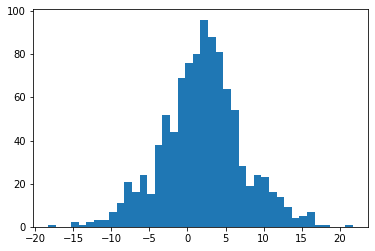

Истинное математическое ожидание E =  2.000000
Истинная дисперсия D =  29.608813
Полученное в результате моделирования E =  1.974768
Полученная в результате моделирования D =  28.529437
Критерий Пирсона: 40.039632, квантиль: 43.800000
Kolmagorov: 0.568834, квантиль: 1.630000


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm
from scipy.stats import exponweib
from scipy.stats import logistic

PIRSON_QUANTIL = 43.8
KOLMAGOROV_QUANTIL = 1.63
INTERVALS = 30


def pirson_stat(values, intervals, distribution, param1, param2):
    stat = 0
    step = (max(values) - min(values)) / intervals

    x = min(values)
    y = x + step
    for i in range(1, INTERVALS):
        observed = 0
        for val in values:
            if x < val <= y:
                observed += 1

        expected = len(values) * (distribution(y, param1, param2) - distribution(x, param1, param2))
        stat += ((observed - expected) ** 2 + 1e-9) / (expected + 1e-9)
        x = y
        y += step

    return stat


def Kolmagorov(a, n, distribution, param1, param2):
    D = 0
    step = (max(a) - min(a)) / INTERVALS
    count = 0
    x = min(a)

    for i in range(INTERVALS):
        for el in a:
            if el < x:
                count += 1
        temp = math.fabs(count / n - (distribution(x, param1, param2)))
        if D < temp:
            D = temp
        count = 0
        x += step

    return D * math.sqrt(n)


m = 4
s = 25


def normal_func(x, m, s):
    return norm.cdf(x=x, loc=m, scale=s)


print("\n\n\nНормальное распределние:")
normal_arr = norm.rvs(m, s ** 0.5, size=1000)
E = sum(normal_arr) / len(normal_arr)
D = sum((x - E) ** 2 for x in normal_arr) / len(normal_arr)
plt.hist(normal_arr, bins=np.arange(min(normal_arr), max(normal_arr) + 1, 1))
plt.show()
print("Истинное математическое ожидание E =  %f" % (m))
print("Истинная дисперсия D =  %f" % (s))
print("Полученное в результате моделирования E =  %f" % (E))
print("Полученная в результате моделирования D =  %f" % (D))
pirson = pirson_stat(normal_arr, INTERVALS, normal_func, m, s ** 0.5)
kolmagorov = Kolmagorov(normal_arr, 1000, normal_func, m, s ** 0.5)
print("Критерий Пирсона: %f, квантиль: %f" % (pirson, PIRSON_QUANTIL))
print("Критерий Колмагорова: %f, квантиль: %f" % (kolmagorov, KOLMAGOROV_QUANTIL))

alpha = 4
beta = 0.5


def weibull_func(x, a, b):
    return exponweib.cdf(x=x, a=alpha, c=beta)


print("\n\n\nРаспределение Вейбулла:")
weibull_arr = exponweib.rvs(a=alpha, c=beta, size=1000)
plt.hist(weibull_arr, bins=np.arange(min(weibull_arr), max(weibull_arr) + 1, 1))
plt.show()

E = sum(weibull_arr) / len(weibull_arr)
D = sum((x - E) ** 2 for x in weibull_arr) / len(weibull_arr)

E_ = beta * math.gamma(1 + 1 / alpha)
D_ = beta ** (-2 / alpha) * (math.gamma(1 + 2 / alpha) - math.gamma(1 + 1 / alpha) ** 2)
print("Истинное математическое ожидание E =  %f" % (E_))
print("Истинная дисперсия D =  %f" % (D_))
print("Полученное в результате моделирования E =  %f" % (E))
print("Полученная в результате моделирования D =  %f" % (D))
pirson = pirson_stat(weibull_arr, INTERVALS, weibull_func, alpha, beta)
kolmagorov = Kolmagorov(weibull_arr, 1000, weibull_func, alpha, beta)
print("Критерий Пирсона: %f, квантиль: %f" % (pirson, PIRSON_QUANTIL))
print("Критерий Колмагорова: %f, квантиль: %f" % (kolmagorov, KOLMAGOROV_QUANTIL))

alpha = 2
beta = 3


def logistic_func(x, a, b):
    return logistic.cdf(x=x, loc=a, scale=b)



print("\n\n\n\nЛогистическое распредление:")
logistic_arr = logistic.rvs(alpha, beta, size=1000)
plt.hist(logistic_arr, bins=np.arange(min(logistic_arr), max(logistic_arr) + 1, 1))
plt.show()

E = sum(logistic_arr) / len(logistic_arr)
D = sum((x - E) ** 2 for x in logistic_arr) / len(logistic_arr)
E_ = alpha
D_ = math.pi ** 2 * beta ** 2 / 3


print("Истинное математическое ожидание E =  %f" % (E_))
print("Истинная дисперсия D =  %f" % (D_))
print("Полученное в результате моделирования E =  %f" % (E))
print("Полученная в результате моделирования D =  %f" % (D))
pirson = pirson_stat(logistic_arr, INTERVALS, logistic_func, alpha, beta)
kolmagorov = Kolmagorov(logistic_arr, 1000, logistic_func, alpha, beta)
print("Критерий Пирсона: %f, квантиль: %f" % (pirson, PIRSON_QUANTIL))
print("Kolmagorov: %f, квантиль: %f" % (kolmagorov, KOLMAGOROV_QUANTIL))
